In [2]:
import numpy as np
import pandas as pd

In [9]:
# Creating a completely empty CSV file
with open('mega_chemical_harmness_category2.csv', mode='w', newline='') as file:
    pass

print("Completely empty CSV file has been created successfully.")


Completely empty CSV file has been created successfully.


In [10]:
import csv

input_txt_file = 'ingredient_dataset (1).txt'
output_csv_file = 'mega_chemical_harmness_category2.csv'

# Reading the text file
with open(input_txt_file, 'r') as txtfile:
    lines = txtfile.readlines()

# Writing to the CSV file
with open(output_csv_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for line in lines:
        # Assuming the values are separated by commas
        row = line.strip().split(',')
        writer.writerow(row)

print("Text file has been converted to CSV successfully.")


Text file has been converted to CSV successfully.


In [11]:
data=pd.read_csv("mega_chemical_harmness_category2.csv")
data.head()

,,,,ingredients,category
"""Caprylyl Glucoside",Octyl Glucoside,Decyl Glucoside,Lauryl Glucoside,"Coco Glucoside""",personal_care
"""Polysorbate 20",Polysorbate 40,Polysorbate 60,Polysorbate 80,"Polysorbate 85""",cleaning
"""Polysorbate 85",Polysorbate 20,Polysorbate 80,Polysorbate 40,"Polysorbate 60""",cleaning
"""Polysorbate 60",Polysorbate 80,Polysorbate 85,Polysorbate 20,"Polysorbate 40""",cleaning
"""Polysorbate 40",Polysorbate 60,Polysorbate 20,Polysorbate 85,"Polysorbate 80""",cleaning


In [39]:
data.shape

(624, 9)

In [40]:
data=data.drop_duplicates()
data.shape

(615, 9)

In [26]:
data['category'].value_counts()

category
food             45
cosmetic         45
personal_care    43
cleaning         40
stationery       40
medicine         40
others           39
household        38
Name: count, dtype: int64

In [24]:
data.to_csv("500rows.csv",index=False)

**Harmness Detector**

In [11]:
# chem=pd.read_csv("Chemicals_name2.csv")
# chem.head()

In [ ]:
# def get_harm_info(chemical_name):
#     # Case-insensitive search
#     row = harm_df[harm_df["chemical_name"].str.lower() == chemical_name.lower()]
    
#     if not row.empty:
#         harm_score = int(row["harm_score"].values[0])
#         alternative = row["alternative"].values[0]
#         return harm_score, alternative
#     else:
#         # If chemical not found, treat as safe with no alternative
#         return 0, None


In [10]:
def get_harm_info(chemical_name):
    row=chem[chem["chemical_name"].str.lower()==chemical_name.lower()]

    if not row.empty:
        harm_score=int(row["harm_score"].values[0])
        #no alternative values
        return harm_score

    else:
        #chemicals name not found return Safe 
        return 0,None

In [8]:
filtered_chemicals = ["Sodium Lauryl Sulfate", "Methylparaben", "Aloe Vera"]


In [9]:
# for chemical in filtered_chemicals:
#     harm_score, alternative = get_harm_info(chemical)
#     print(f"Chemical: {chemical}")
#     print(f"  Harmfulness Score: {harm_score}%")
#     if alternative:
#         print(f"  Safer Alternative: {alternative}")
#     else:
#         print("  No safer alternative found.")
#     print()


In [10]:
#integration with chemical 
for chemical in filtered_chemicals:
    harm_score = get_harm_info(chemical)
    print(f"Chemical:{chemical}")
    print(f"Harmfullness Score: {harm_score}%")

    # if alternative:
    #     print(f"Safer Alternative:{Alternative}")
    # else:
    #     print("No safer alternative")
    # print()

Chemical:Sodium Lauryl Sulfate
Harmfullness Score: 80%
Chemical:Methylparaben
Harmfullness Score: 90%
Chemical:Aloe Vera
Harmfullness Score: 0%


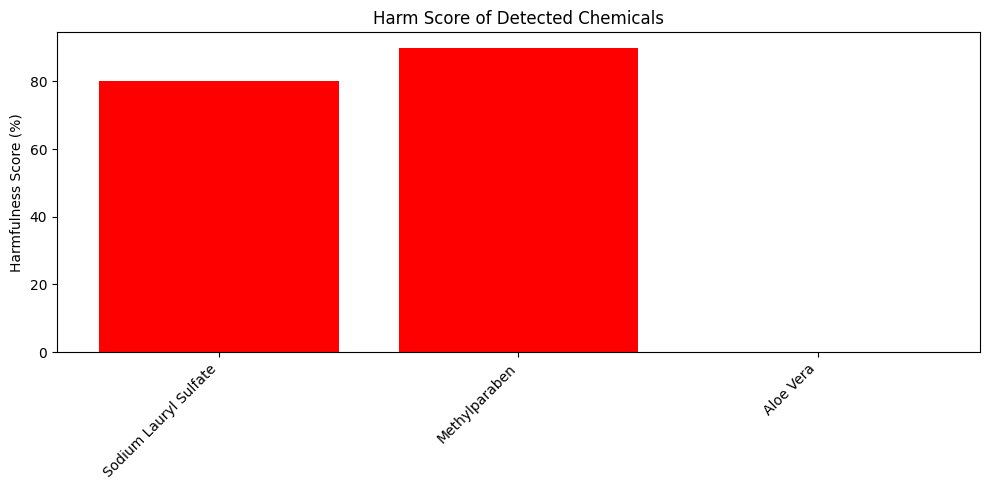

In [11]:
import matplotlib.pyplot as plt

# Prepare data
chemical_names = filtered_chemicals
harm_scores = [get_harm_info(c) for c in chemical_names]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(chemical_names, harm_scores, color=['green' if s <= 30 else 'orange' if s <= 70 else 'red' for s in harm_scores])
plt.xticks(rotation=45, ha='right')
plt.ylabel("Harmfulness Score (%)")
plt.title("Harm Score of Detected Chemicals")
plt.tight_layout()
plt.show()

In [38]:
data['category'] = data['category'].str.replace('"', '')

In [39]:
data['category'].unique()

array(['food', 'cosmetic', 'personal_care', 'cleaning', 'stationery',
       'household', 'medicine', 'others', nan], dtype=object)

In [40]:
data.isnull().sum()

ingredients    0
category       1
dtype: int64

In [41]:
data.shape

(1093, 2)

In [42]:
data=data.dropna()
data.shape

(1092, 2)

In [24]:
data=data.drop_duplicates()
data.shape

(180, 2)

In [43]:
dup=data.duplicated()
dup.sum()

912

In [44]:
data=data.drop_duplicates()
data.shape

(180, 2)